In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
%matplotlib inline  
import pandas as pd
import info
import cv2
import numpy as np

In [2]:
'''
(1) forward pred, forward prey
(2) forward pred, normal prey
(3) normal pred, forward prey
(4) normal pred, normal prey
'''

df_1_pred = pd.read_csv('./results/chasing_prey/et/take_10/pred_evaluating_progress.tsv', sep='\t')
df_1_prey = pd.read_csv('./results/chasing_prey/et/take_10/prey_evaluating_progress.tsv', sep='\t')

df_2_pred = pd.read_csv('./results/chasing_prey/andi/take_07/evaluating/pred_evaluating_progress.tsv', sep='\t')
df_2_prey = pd.read_csv('./results/chasing_prey/andi/take_07/evaluating/prey_evaluating_progress.tsv', sep='\t')

df_3_pred = pd.read_csv('./results/chasing_prey/gd/take_10/evaluating/pred_evaluating_progress.tsv', sep='\t')
df_3_prey = pd.read_csv('./results/chasing_prey/gd/take_10/evaluating/prey_evaluating_progress.tsv', sep='\t')

df_4_pred = pd.read_csv('./results/chasing_prey/andi/take_08/evaluating/pred_evaluating_progress.tsv', sep='\t')
df_4_prey = pd.read_csv('./results/chasing_prey/andi/take_08/evaluating/prey_evaluating_progress.tsv', sep='\t')
    
dfs_pred = [df_1_pred, df_2_pred, df_3_pred, df_4_pred]
dfs_prey = [df_1_prey, df_2_prey, df_3_prey, df_4_prey]

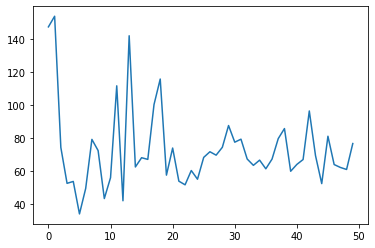

In [3]:
plt.plot(df_3_pred['accu_reward'])
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


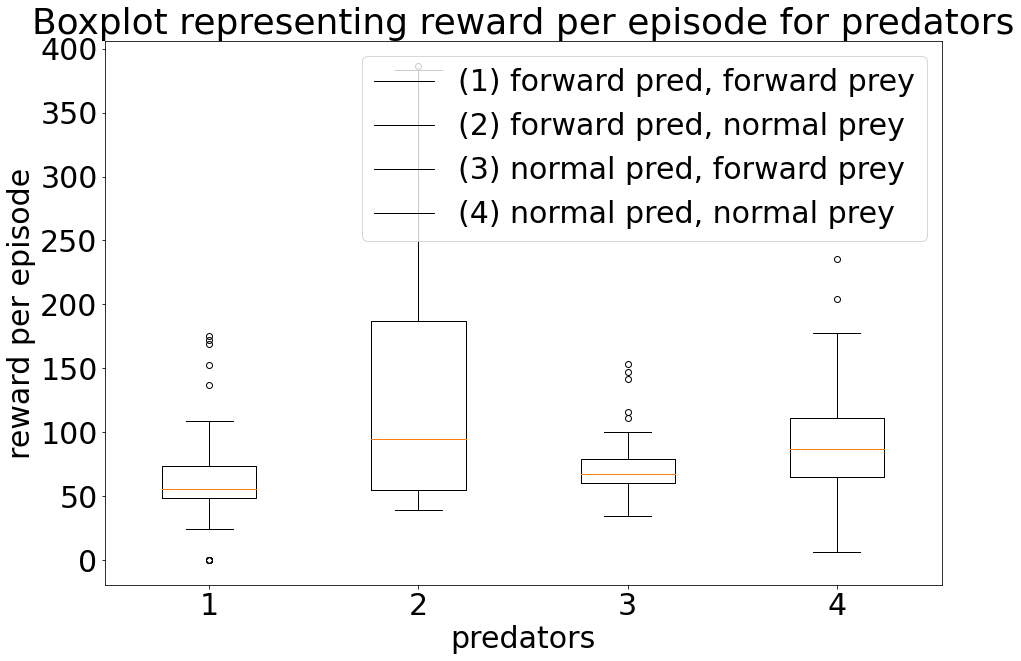

In [21]:
# pred reward
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
plt.boxplot([df_1_pred['accu_reward'], df_2_pred['accu_reward'], df_3_pred['accu_reward'], df_4_pred['accu_reward']])
plt.xlabel('predators')
plt.ylabel('reward per episode')
# plt.title('Boxplot representing reward per episode for predators')
plt.legend(
    ['(1) forward pred, forward prey',
'(2) forward pred, normal prey',
'(3) normal pred, forward prey',
'(4) normal pred, normal prey',]
)
plt.savefig('../img/task_3/boxplot_preds_accu_reward_episode.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


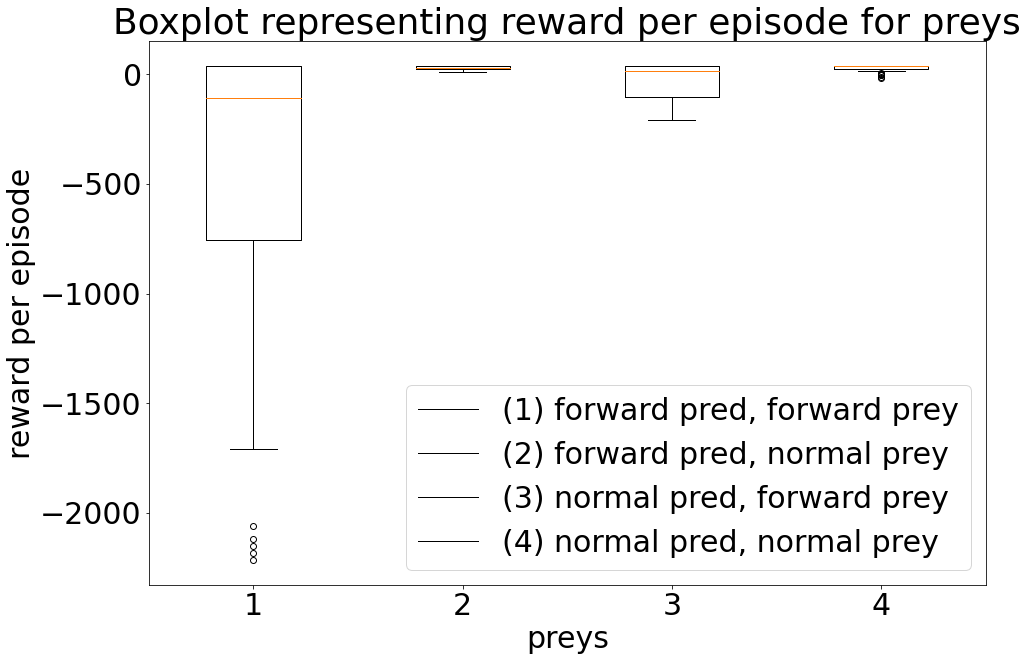

In [20]:
# prey reward
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
plt.boxplot([df_1_prey['accu_reward'], df_2_prey['accu_reward'], df_3_prey['accu_reward'], df_4_prey['accu_reward']])
plt.xlabel('preys')
plt.ylabel('reward per episode')
# plt.title('Boxplot representing reward per episode for preys')
plt.legend(
    ['(1) forward pred, forward prey',
'(2) forward pred, normal prey',
'(3) normal pred, forward prey',
'(4) normal pred, normal prey',]
)
plt.savefig('../img/task_3/boxplot_preys_accu_reward_episode.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


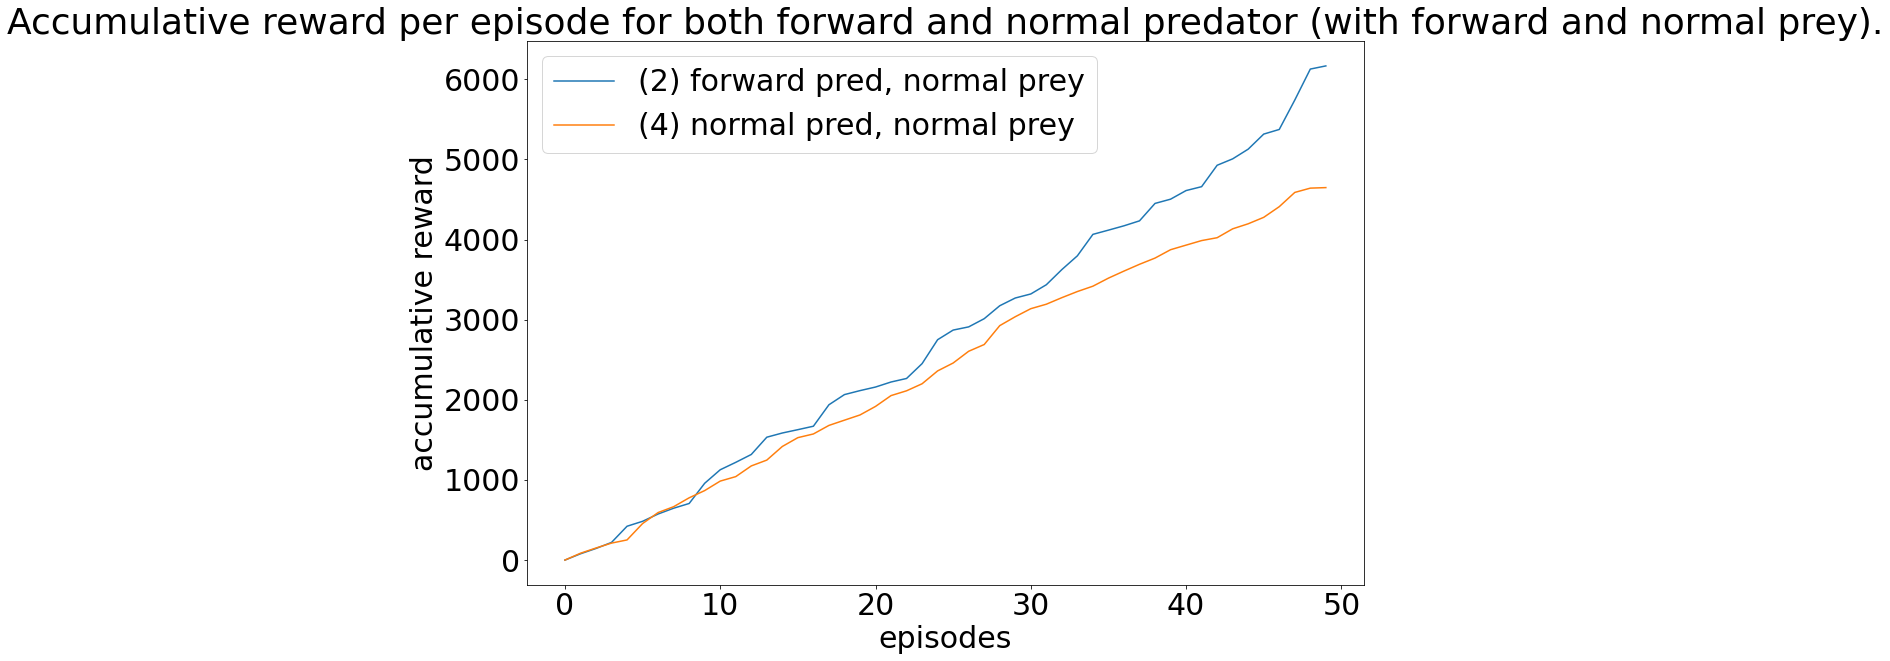

In [22]:
#  pred accumulative summed reward

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
for k,v in enumerate(dfs_pred):
    if k == 1 or k == 3:
        summed_pred = [sum(v['accu_reward'].iloc[0:i]) for i in range(len(v))]
        plt.plot(summed_pred)
plt.ylabel('accumulative reward')
plt.xlabel('episodes')
# plt.title('Accumulative reward per episode for both forward and normal predator (with forward and normal prey).')
plt.legend(
[
    # '(1) forward pred, forward prey',
    '(2) forward pred, normal prey',
    # '(3) normal pred, forward prey',
    '(4) normal pred, normal prey'
]
)
plt.savefig('../img/task_3/lineplot_summed_preds_accu_reward_episode.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


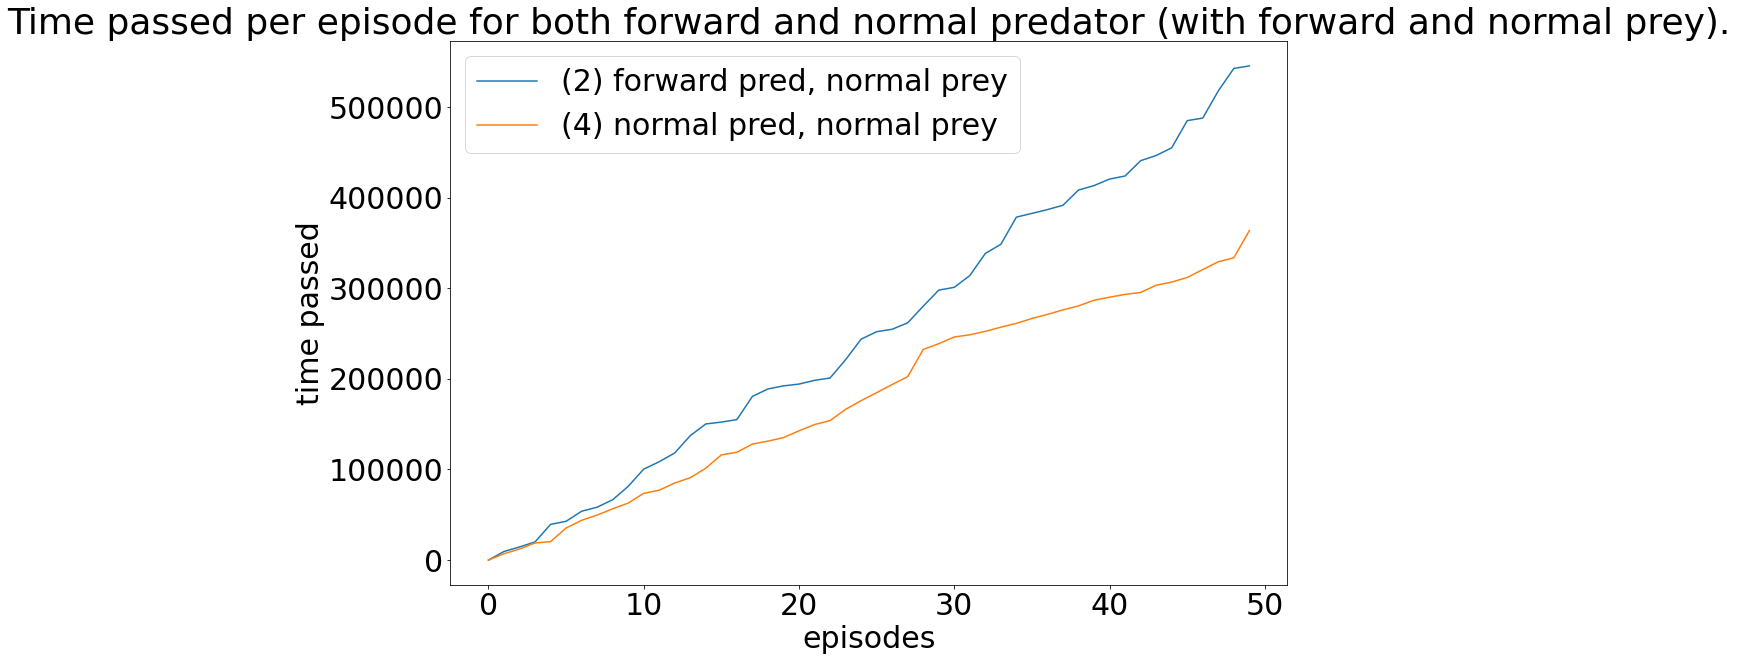

In [23]:
#  pred summed time passed

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
_dfsum = pd.DataFrame()
for k,v in enumerate(dfs_pred):
    if k == 1 or k == 3:
        summed_pred = [sum(v['time_passed'].iloc[0:i]) for i in range(len(v))]
        plt.plot(summed_pred)
# plt.ylim([-300, 400])
plt.ylabel('time passed')
plt.xlabel('episodes')
# plt.title('Time passed per episode for both forward and normal predator (with forward and normal prey).')
plt.legend(
[
    # '(1) forward pred, forward prey',
    '(2) forward pred, normal prey',
    # '(3) normal pred, forward prey',
    '(4) normal pred, normal prey'
    ]
)
plt.savefig('../img/task_3/lineplot_summed_preds_time_episode.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


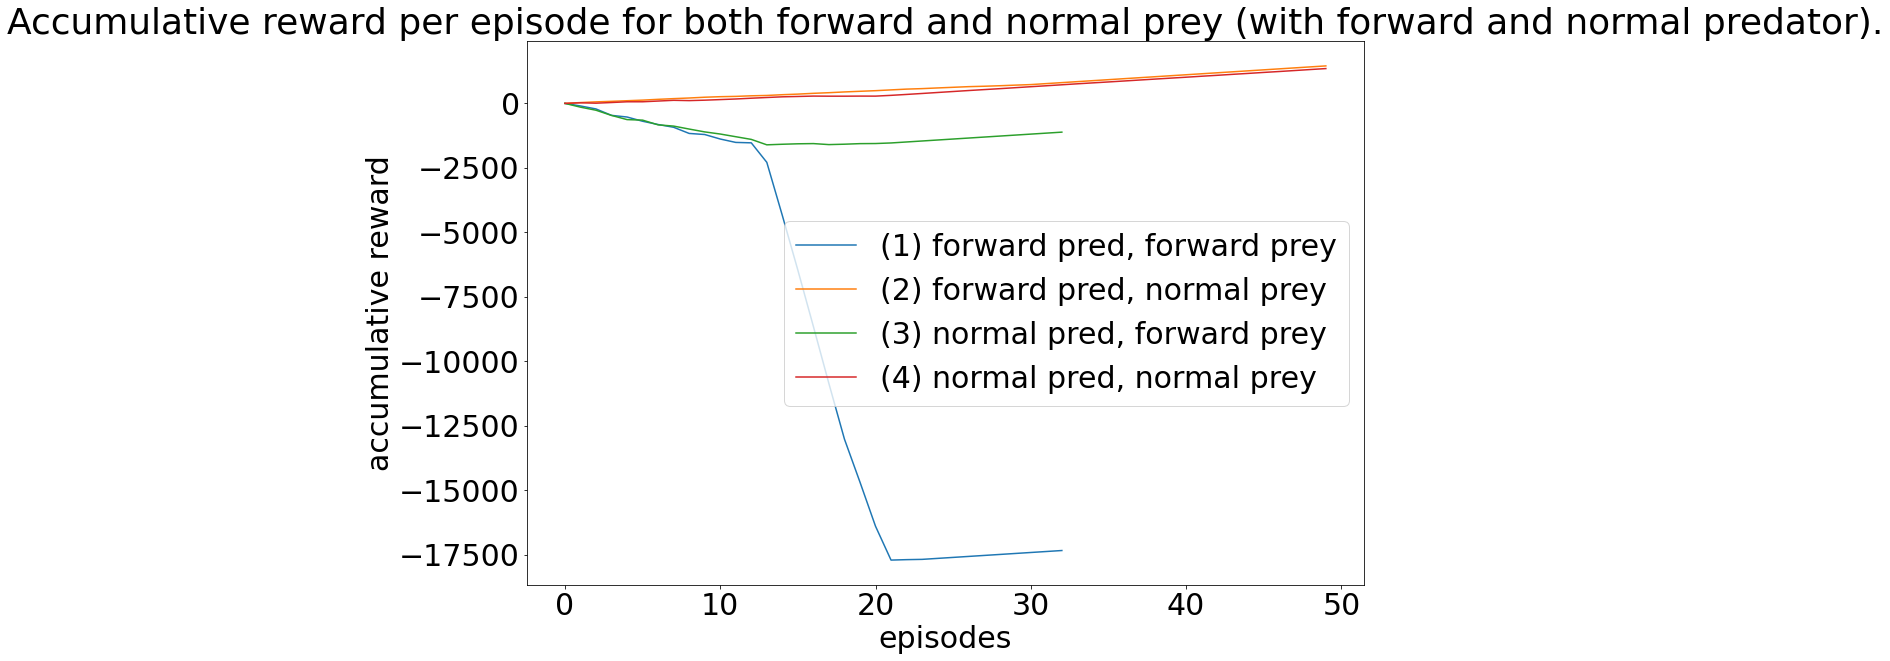

In [24]:
# plot preys

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})

for prey in dfs_prey:
    summed_prey = [sum(prey['accu_reward'].iloc[0:i]) for i in range(len(prey))]
    plt.plot(summed_prey)
plt.ylabel('accumulative reward')
plt.xlabel('episodes')
# plt.title('Accumulative reward per episode for both forward and normal prey (with forward and normal predator).')
plt.legend(
['(1) forward pred, forward prey',
'(2) forward pred, normal prey',
'(3) normal pred, forward prey',
'(4) normal pred, normal prey',]
)
plt.savefig('../img/task_3/lineplot_summed_preys_accu_reward_episode.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


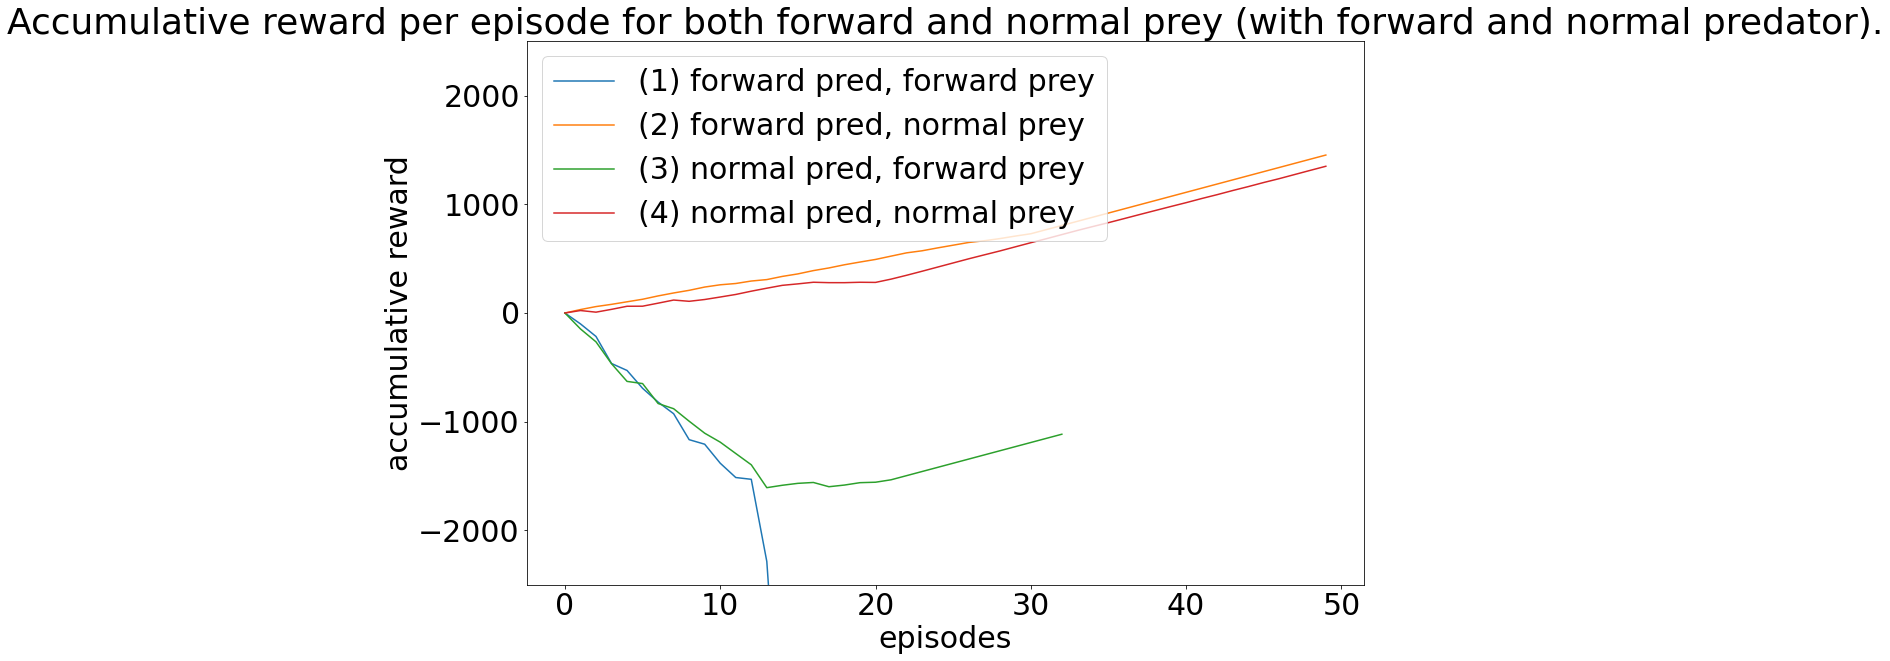

In [25]:

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 30})
for prey in dfs_prey:
    summed_prey = [sum(prey['accu_reward'].iloc[0:i]) for i in range(len(prey))]
    plt.plot(summed_prey)
plt.ylim([-2500, 2500])
plt.ylabel('accumulative reward')
plt.xlabel('episodes')
# plt.title('Accumulative reward per episode for both forward and normal prey (with forward and normal predator).')
plt.legend(
['(1) forward pred, forward prey',
'(2) forward pred, normal prey',
'(3) normal pred, forward prey',
'(4) normal pred, normal prey',]
)
plt.savefig('../img/task_3/lineplot_summed_preys_accu_reward_episode_ZOOM.eps')


## BEST PRED: NORMAL PRED
## BEST PREY: NORMAL PREY

# LEARNING PROGRESS

In [ ]:
# pred reward
plt.figure(figsize=(15,10))
plt.boxplot([df_1_pred['accu_reward'], df_2_pred['accu_reward'], df_3_pred['accu_reward'], df_4_pred['accu_reward']])
plt.xlabel('predators')
plt.ylabel('reward per episode')
plt.title('Boxplot representing reward per episode for predators')
plt.legend(
    ['(1) forward pred, forward prey',
'(2) forward pred, normal prey',
'(3) normal pred, forward prey',
'(4) normal pred, normal prey',]
)
plt.savefig('../img/task_3/boxplot_preds_accu_reward_episode.png')

In [4]:

df_pred = pd.read_csv('C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/src/results/chasing_prey/andi/take_05/learning/pred_learning_progress.tsv', sep='\t')
df_prey = pd.read_csv('C:/Users/Hammock/Documents/VU_masters_AI/learning_machines/learning_machines_robobo/src/results/chasing_prey/andi/take_05/learning/prey_learning_progress.tsv', sep='\t')
# -------- Plot rewards
summed_pred = [sum(df_pred['time_passed'].iloc[0:i]) for i in range(len(df_pred))]
# compute moving average
summed_pred[-1]

7019600.0

In [13]:
summed_prey = [sum(df_prey['time_passed'].iloc[0:i]) for i in range(len(df_prey))]
summed_prey[-1]

7895000.0

In [14]:
summed_prey

[0,
 30000.0,
 60400.0,
 90800.0,
 121200.0,
 151300.0,
 181300.0,
 211500.0,
 241900.0,
 272000.0,
 302000.0,
 332000.0,
 362000.0,
 392000.0,
 422100.0,
 452100.0,
 482100.0,
 512100.0,
 542100.0,
 572100.0,
 602100.0,
 632100.0,
 662100.0,
 692100.0,
 722100.0,
 752100.0,
 782300.0,
 812300.0,
 842300.0,
 872300.0,
 902300.0,
 932300.0,
 962300.0,
 992300.0,
 1022300.0,
 1052300.0,
 1082300.0,
 1112300.0,
 1142300.0,
 1172300.0,
 1202300.0,
 1232300.0,
 1262300.0,
 1292300.0,
 1322300.0,
 1352300.0,
 1382300.0,
 1412300.0,
 1442300.0,
 1472300.0,
 1502300.0,
 1532300.0,
 1562300.0,
 1592300.0,
 1622300.0,
 1652300.0,
 1682300.0,
 1712300.0,
 1742300.0,
 1772300.0,
 1802300.0,
 1832300.0,
 1862300.0,
 1892300.0,
 1922300.0,
 1952300.0,
 1982300.0,
 2012300.0,
 2042300.0,
 2072300.0,
 2102300.0,
 2132300.0,
 2162300.0,
 2192300.0,
 2222300.0,
 2252300.0,
 2282300.0,
 2312300.0,
 2342300.0,
 2372300.0,
 2402300.0,
 2432300.0,
 2462400.0,
 2492400.0,
 2522400.0,
 2552400.0,
 2582400.0,
